In [1]:
import pybamm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import dfols
import signal
from scipy.integrate import solve_ivp
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import savgol_filter
from scipy.signal import find_peaks
from scipy import interpolate, integrate
from stopit import threading_timeoutable as timeoutable
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from batfuns import *
plt.rcParams = set_rc_params(plt.rcParams)
import winsound
from pybamm import exp, constants, Parameter
import pickle
eSOH_DIR = "../data/esoh_R/"
oCV_DIR = "../data/ocv/"
cyc_DIR = "../data/cycling/"
fig_DIR = "../figures/figures_temperature/"
res_DIR = "../data/results/"
resistance_DIR = "../data/resistance/"
# %matplotlib widget

In [2]:
cells = np.arange(1,22)
esoh_data = {}
for cell in cells:
    cell_no,dfe,dfe_0,dfo_0,N,N_0 = load_data(cell,eSOH_DIR,oCV_DIR)
    esoh_data[cell] = dfe

In [3]:
esoh_vars = ["x_100", "y_0", "C_n", "C_p", "Capacity [A.h]", "Loss of lithium inventory [%]"]
colors =["tab:green","tab:blue","tab:red","tab:orange","tab:grey"]
colors =["green","blue","red","orange","grey"]
markers = ["x","o","v","+"]

In [5]:
# fig.savefig(fig_DIR+"C5_temp_eSOH.png")
# plt.show()

In [6]:
dssf

NameError: name 'dssf' is not defined

# C/5 Cycling

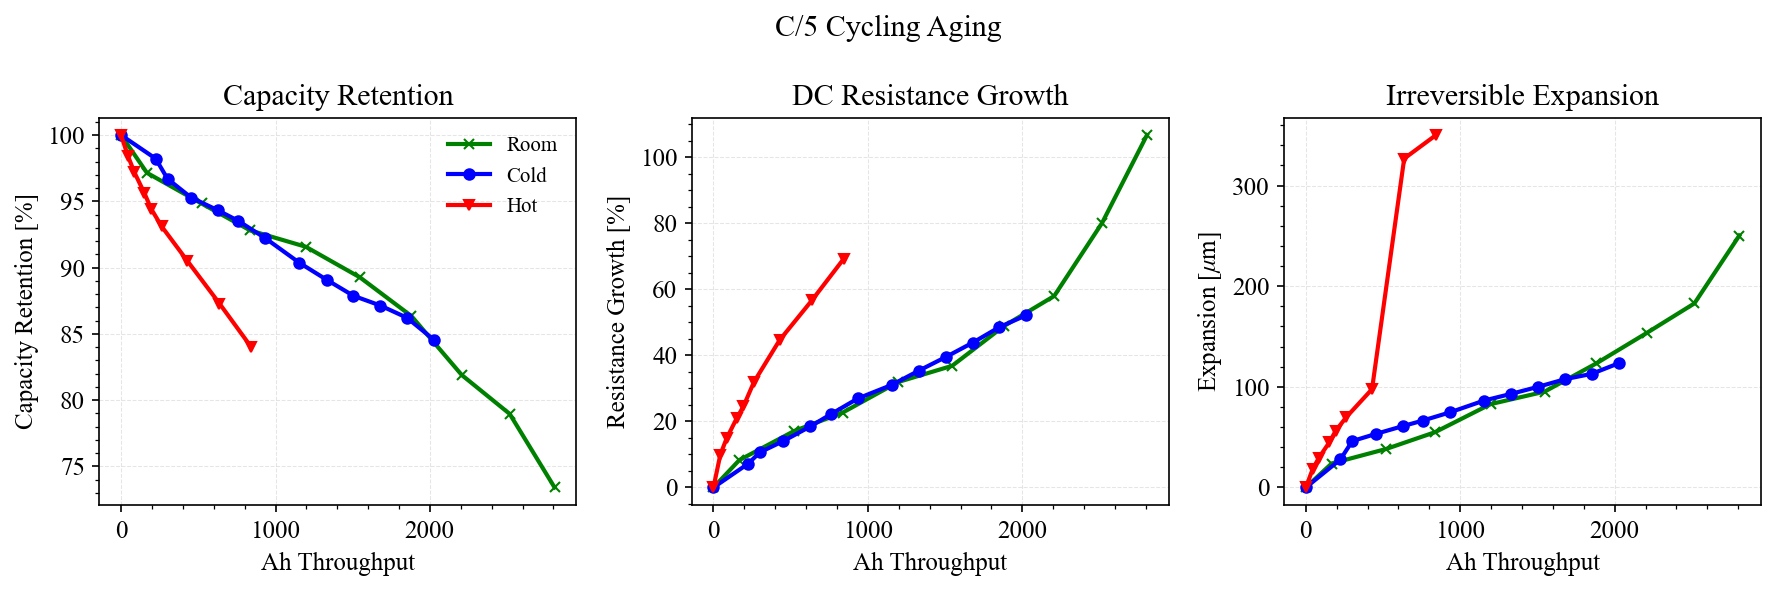

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
cells = [1,2,3]
ax1 = ax.flat[0]
name = "Capacity Retention [%]"
for i,n in enumerate(cells):
    ax1.plot(esoh_data[n]["Ah_th"],esoh_data[n][name],markersize=5,color=colors[i],marker=markers[i])
ax1.legend(["Room","Cold","Hot"])
ax2 = ax.flat[1]
name = "Rs_ave"
for i,n in enumerate(cells):
    ax2.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name]-esoh_data[n][name][0])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i])
ax3 = ax.flat[2]
name = "irrev_exp"
for i,n in enumerate(cells):
    ax3.plot(esoh_data[n]["Ah_th"],esoh_data[n][name],markersize=5,color=colors[i],marker=markers[i])
ax1.set_title("Capacity Retention")
ax2.set_title("DC Resistance Growth")
ax3.set_title("Irreversible Expansion")
ax1.set_ylabel(r"Capacity Retention [%]")
ax2.set_ylabel(r'Resistance Growth [%]')
ax3.set_ylabel(r"Expansion [$\mu$m]")
ax1.set_xlabel("Ah Throughput")
ax2.set_xlabel("Ah Throughput")
ax3.set_xlabel("Ah Throughput")
fig.suptitle("C/5 Cycling Aging")
fig.tight_layout()
fig.savefig(fig_DIR+"C5_temp_summary.png")
plt.show()

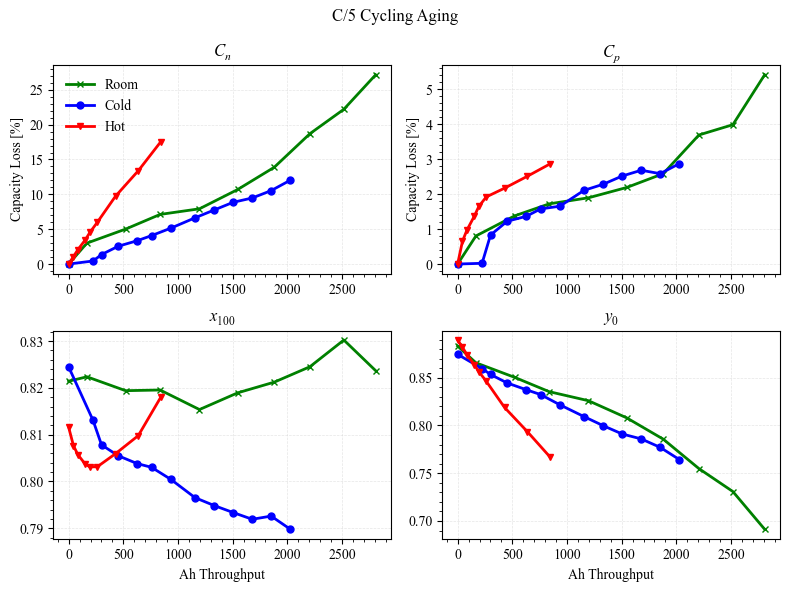

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(8,6))
cells = [1,2,3]
ax1 = ax.flat[0]
name = "C_n"
for i,n in enumerate(cells):
    ax1.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name][0]-esoh_data[n][name])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i])
ax1.legend(["Room","Cold","Hot"])
ax2 = ax.flat[1]
name = "C_p"
for i,n in enumerate(cells):
    ax2.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name][0]-esoh_data[n][name])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i])
ax3 = ax.flat[2]
name = "x_100"
for i,n in enumerate(cells):
    ax3.plot(esoh_data[n]["Ah_th"],esoh_data[n][name],markersize=5,color=colors[i],marker=markers[i])
ax4 = ax.flat[3]
name = "y_0"
for i,n in enumerate(cells):
    ax4.plot(esoh_data[n]["Ah_th"],esoh_data[n][name],markersize=5,color=colors[i],marker=markers[i])
ax1.set_title(r"$C_n$")
ax2.set_title(r"$C_p$")
ax3.set_title(r"$x_{100}$")
ax4.set_title(r"$y_{0}$")
ax1.set_ylabel(r"Capacity Loss [%]")
ax2.set_ylabel(r"Capacity Loss [%]")
ax3.set_xlabel("Ah Throughput")
ax4.set_xlabel("Ah Throughput")
fig.suptitle("C/5 Cycling Aging")
fig.tight_layout()
fig.savefig(fig_DIR+"C5_temp_eSOH.png")
plt.show()

# 1.5C Cycling

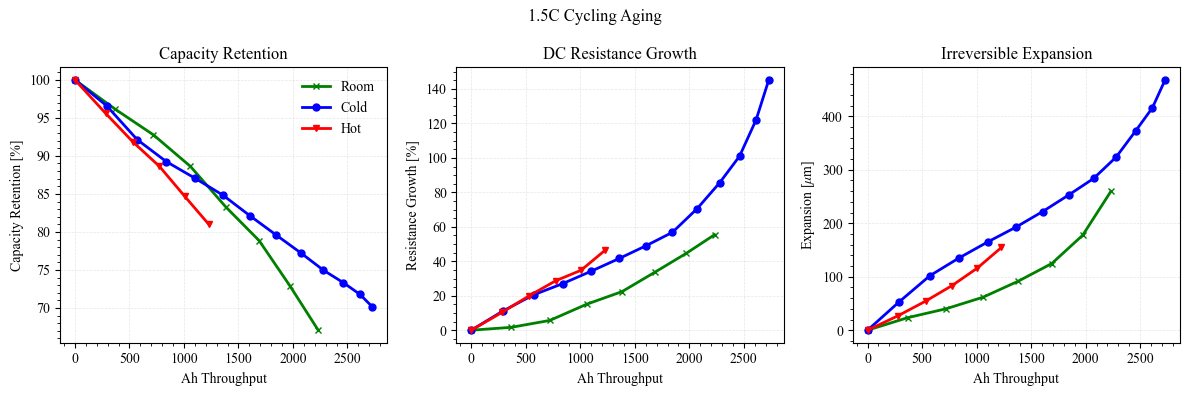

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
cells = [4,5,6]
ax1 = ax.flat[0]
name = "Capacity Retention [%]"
for i,n in enumerate(cells):
    ax1.plot(esoh_data[n]["Ah_th"],esoh_data[n][name],markersize=5,color=colors[i],marker=markers[i])
ax1.legend(["Room","Cold","Hot"])
ax2 = ax.flat[1]
name = "Rs_ave"
for i,n in enumerate(cells):
    ax2.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name]-esoh_data[n][name][0])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i])
ax3 = ax.flat[2]
name = "irrev_exp"
for i,n in enumerate(cells):
    ax3.plot(esoh_data[n]["Ah_th"],esoh_data[n][name],markersize=5,color=colors[i],marker=markers[i])
ax1.set_title("Capacity Retention")
ax2.set_title("DC Resistance Growth")
ax3.set_title("Irreversible Expansion")
ax1.set_ylabel(r"Capacity Retention [%]")
ax2.set_ylabel(r'Resistance Growth [%]')
ax3.set_ylabel(r"Expansion [$\mu$m]")
ax1.set_xlabel("Ah Throughput")
ax2.set_xlabel("Ah Throughput")
ax3.set_xlabel("Ah Throughput")
fig.suptitle("1.5C Cycling Aging")
fig.tight_layout()
fig.savefig(fig_DIR+"1p5C_temp_summary.png")
plt.show()

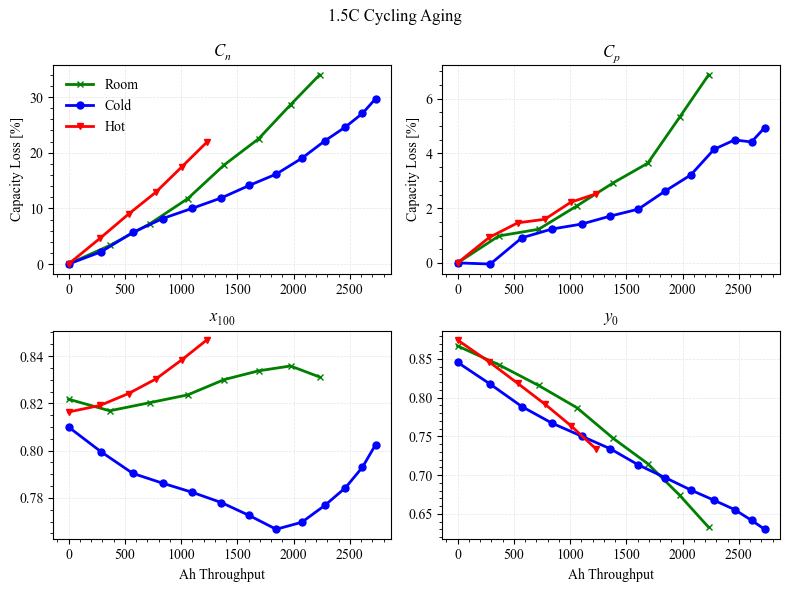

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(8,6))
cells = [4,5,6]
ax1 = ax.flat[0]
name = "C_n"
for i,n in enumerate(cells):
    ax1.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name][0]-esoh_data[n][name])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i])
ax1.legend(["Room","Cold","Hot"])
ax2 = ax.flat[1]
name = "C_p"
for i,n in enumerate(cells):
    ax2.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name][0]-esoh_data[n][name])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i])
ax3 = ax.flat[2]
name = "x_100"
for i,n in enumerate(cells):
    ax3.plot(esoh_data[n]["Ah_th"],esoh_data[n][name],markersize=5,color=colors[i],marker=markers[i])
ax4 = ax.flat[3]
name = "y_0"
for i,n in enumerate(cells):
    ax4.plot(esoh_data[n]["Ah_th"],esoh_data[n][name],markersize=5,color=colors[i],marker=markers[i])
ax1.set_title(r"$C_n$")
ax2.set_title(r"$C_p$")
ax3.set_title(r"$x_{100}$")
ax4.set_title(r"$y_{0}$")
ax1.set_ylabel(r"Capacity Loss [%]")
ax2.set_ylabel(r"Capacity Loss [%]")
ax3.set_xlabel("Ah Throughput")
ax4.set_xlabel("Ah Throughput")
fig.suptitle("1.5C Cycling Aging")
fig.tight_layout()
fig.savefig(fig_DIR+"1p5C_temp_eSOH.png")
plt.show()

# 2C Cycling Aging

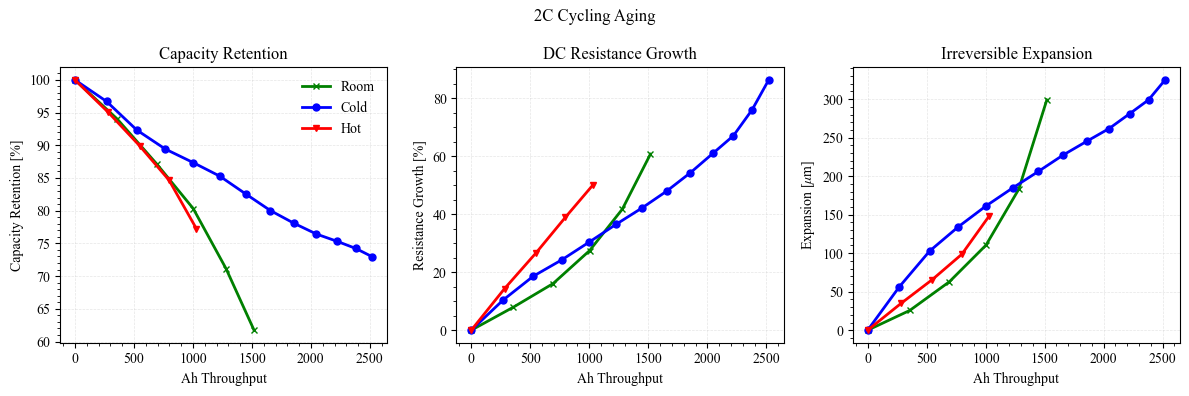

In [ ]:
cells = [7,8,9]
fig, ax = plt.subplots(1,3,figsize=(12,4))
ax1 = ax.flat[0]
name = "Capacity Retention [%]"
for i,n in enumerate(cells):
    ax1.plot(esoh_data[n]["Ah_th"],esoh_data[n][name],markersize=5,color=colors[i],marker=markers[i])
ax1.legend(["Room","Cold","Hot"])
ax2 = ax.flat[1]
name = "Rs_ave"
for i,n in enumerate(cells):
    ax2.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name]-esoh_data[n][name][0])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i])
ax3 = ax.flat[2]
name = "irrev_exp"
for i,n in enumerate(cells):
    ax3.plot(esoh_data[n]["Ah_th"],esoh_data[n][name],markersize=5,color=colors[i],marker=markers[i])
ax1.set_title("Capacity Retention")
ax2.set_title("DC Resistance Growth")
ax3.set_title("Irreversible Expansion")
ax1.set_ylabel(r"Capacity Retention [%]")
ax2.set_ylabel(r'Resistance Growth [%]')
ax3.set_ylabel(r"Expansion [$\mu$m]")
ax1.set_xlabel("Ah Throughput")
ax2.set_xlabel("Ah Throughput")
ax3.set_xlabel("Ah Throughput")
fig.suptitle("2C Cycling Aging")
fig.tight_layout()
fig.savefig(fig_DIR+"2C_temp_summary.png")
plt.show()

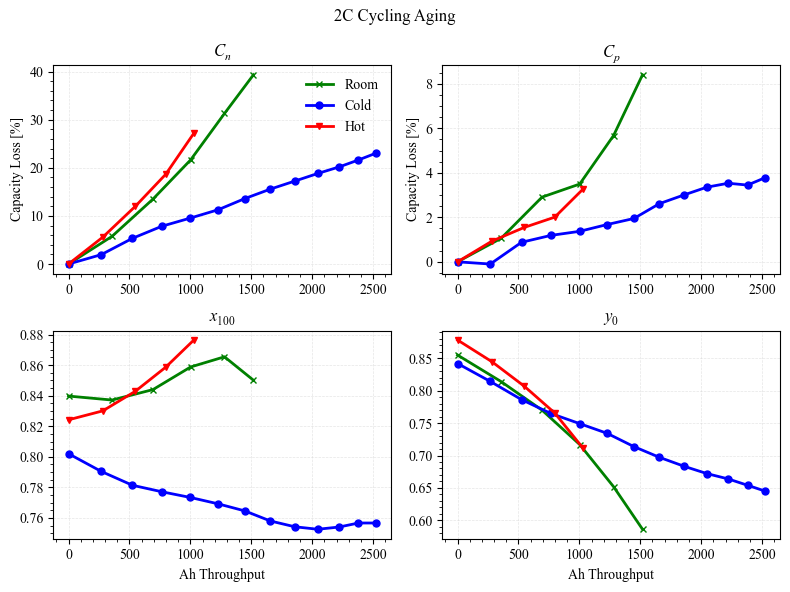

In [ ]:
cells = [7,8,9]
fig, ax = plt.subplots(2,2,figsize=(8,6))
ax1 = ax.flat[0]
name = "C_n"
for i,n in enumerate(cells):
    ax1.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name][0]-esoh_data[n][name])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i])
ax1.legend(["Room","Cold","Hot"])
ax2 = ax.flat[1]
name = "C_p"
for i,n in enumerate(cells):
    ax2.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name][0]-esoh_data[n][name])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i])
ax3 = ax.flat[2]
name = "x_100"
for i,n in enumerate(cells):
    ax3.plot(esoh_data[n]["Ah_th"],esoh_data[n][name],markersize=5,color=colors[i],marker=markers[i])
ax4 = ax.flat[3]
name = "y_0"
for i,n in enumerate(cells):
    ax4.plot(esoh_data[n]["Ah_th"],esoh_data[n][name],markersize=5,color=colors[i],marker=markers[i])
ax1.set_title(r"$C_n$")
ax2.set_title(r"$C_p$")
ax3.set_title(r"$x_{100}$")
ax4.set_title(r"$y_{0}$")
ax1.set_ylabel(r"Capacity Loss [%]")
ax2.set_ylabel(r"Capacity Loss [%]")
ax3.set_xlabel("Ah Throughput")
ax4.set_xlabel("Ah Throughput")
fig.suptitle("2C Cycling Aging")
fig.tight_layout()
fig.savefig(fig_DIR+"2C_temp_eSOH.png")
plt.show()

# Mixed Crate

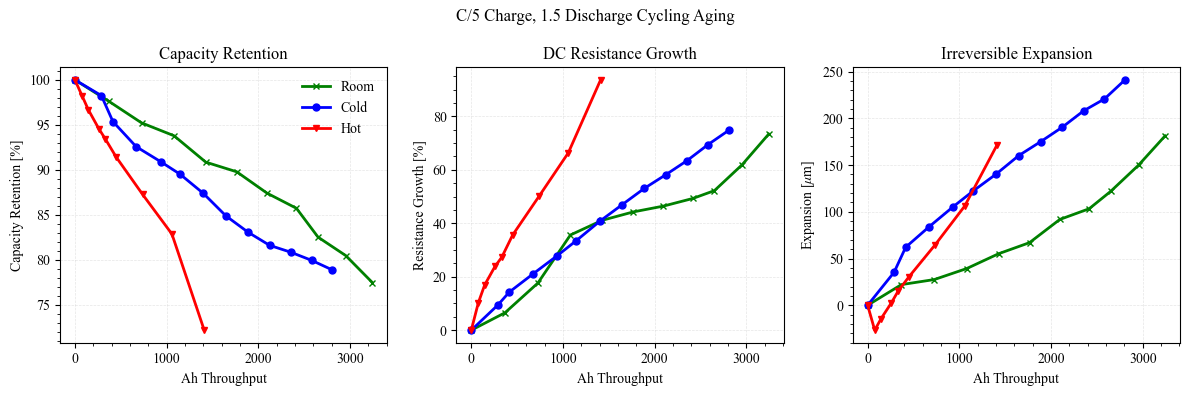

In [ ]:
cells = [10,11,12]
fig, ax = plt.subplots(1,3,figsize=(12,4))
ax1 = ax.flat[0]
name = "Capacity Retention [%]"
for i,n in enumerate(cells):
    ax1.plot(esoh_data[n]["Ah_th"],esoh_data[n][name],markersize=5,color=colors[i],marker=markers[i])
ax1.legend(["Room","Cold","Hot"])
ax2 = ax.flat[1]
name = "Rs_ave"
for i,n in enumerate(cells):
    ax2.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name]-esoh_data[n][name][0])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i])
ax3 = ax.flat[2]
name = "irrev_exp"
for i,n in enumerate(cells):
    ax3.plot(esoh_data[n]["Ah_th"],esoh_data[n][name],markersize=5,color=colors[i],marker=markers[i])
ax1.set_title("Capacity Retention")
ax2.set_title("DC Resistance Growth")
ax3.set_title("Irreversible Expansion")
ax1.set_ylabel(r"Capacity Retention [%]")
ax2.set_ylabel(r'Resistance Growth [%]')
ax3.set_ylabel(r"Expansion [$\mu$m]")
ax1.set_xlabel("Ah Throughput")
ax2.set_xlabel("Ah Throughput")
ax3.set_xlabel("Ah Throughput")
fig.suptitle("C/5 Charge, 1.5 Discharge Cycling Aging")
fig.tight_layout()
fig.savefig(fig_DIR+"MixedC_temp_summary.png")
plt.show()

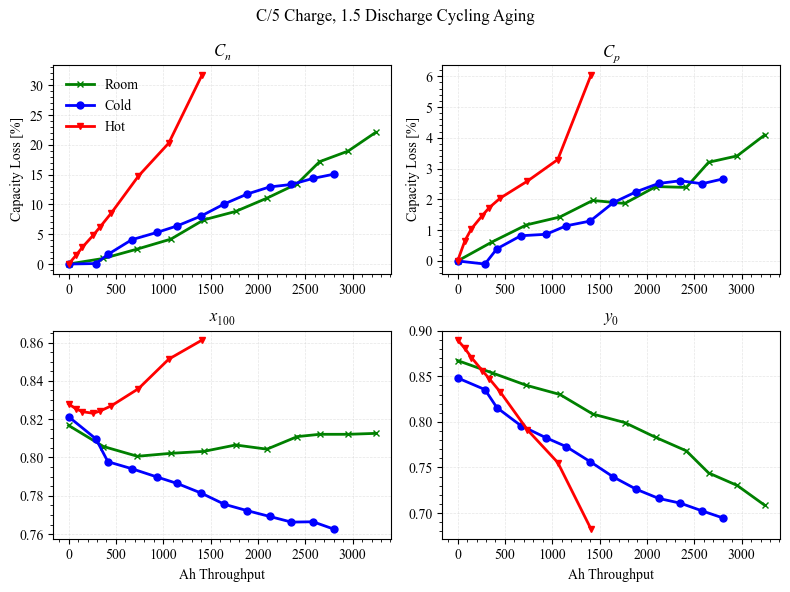

In [ ]:
cells = [10,11,12]
fig, ax = plt.subplots(2,2,figsize=(8,6))
ax1 = ax.flat[0]
name = "C_n"
for i,n in enumerate(cells):
    ax1.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name][0]-esoh_data[n][name])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i])
ax1.legend(["Room","Cold","Hot"])
ax2 = ax.flat[1]
name = "C_p"
for i,n in enumerate(cells):
    ax2.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name][0]-esoh_data[n][name])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i])
ax3 = ax.flat[2]
name = "x_100"
for i,n in enumerate(cells):
    ax3.plot(esoh_data[n]["Ah_th"],esoh_data[n][name],markersize=5,color=colors[i],marker=markers[i])
ax4 = ax.flat[3]
name = "y_0"
for i,n in enumerate(cells):
    ax4.plot(esoh_data[n]["Ah_th"],esoh_data[n][name],markersize=5,color=colors[i],marker=markers[i])
ax1.set_title(r"$C_n$")
ax2.set_title(r"$C_p$")
ax3.set_title(r"$x_{100}$")
ax4.set_title(r"$y_{0}$")
ax1.set_ylabel(r"Capacity Loss [%]")
ax2.set_ylabel(r"Capacity Loss [%]")
ax3.set_xlabel("Ah Throughput")
ax4.set_xlabel("Ah Throughput")
fig.suptitle("C/5 Charge, 1.5 Discharge Cycling Aging")
fig.tight_layout()
fig.savefig(fig_DIR+"MixedC_temp_eSOH.png")
plt.show()

# C/5 50% DOD Cycling

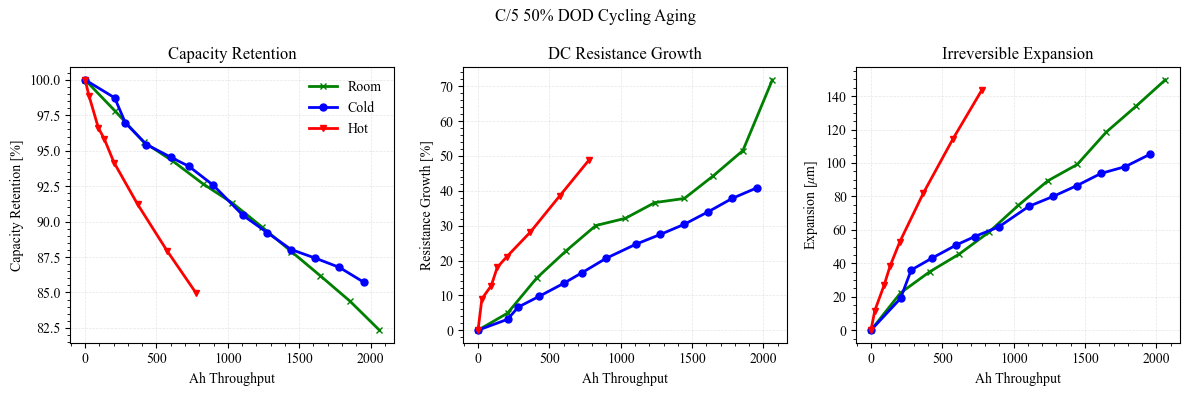

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
cells = [13,14,15]
ax1 = ax.flat[0]
name = "Capacity Retention [%]"
for i,n in enumerate(cells):
    ax1.plot(esoh_data[n]["Ah_th"],esoh_data[n][name],markersize=5,color=colors[i],marker=markers[i])
ax1.legend(["Room","Cold","Hot"])
ax2 = ax.flat[1]
name = "Rs_ave"
for i,n in enumerate(cells):
    ax2.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name]-esoh_data[n][name][0])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i])
ax3 = ax.flat[2]
name = "irrev_exp"
for i,n in enumerate(cells):
    ax3.plot(esoh_data[n]["Ah_th"],esoh_data[n][name],markersize=5,color=colors[i],marker=markers[i])
ax1.set_title("Capacity Retention")
ax2.set_title("DC Resistance Growth")
ax3.set_title("Irreversible Expansion")
ax1.set_ylabel(r"Capacity Retention [%]")
ax2.set_ylabel(r'Resistance Growth [%]')
ax3.set_ylabel(r"Expansion [$\mu$m]")
ax1.set_xlabel("Ah Throughput")
ax2.set_xlabel("Ah Throughput")
ax3.set_xlabel("Ah Throughput")
fig.suptitle("C/5 50% DOD Cycling Aging")
fig.tight_layout()
fig.savefig(fig_DIR+"C5_50DOD_temp_summary.png")
plt.show()

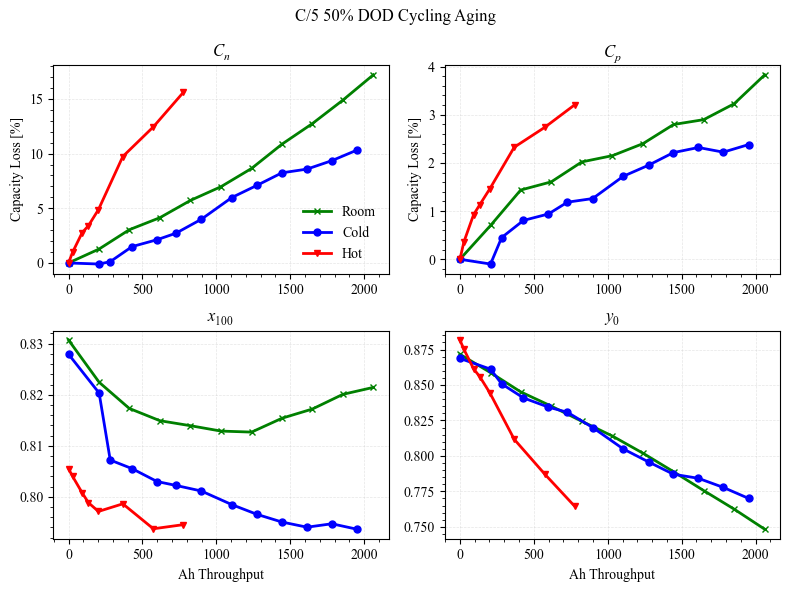

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(8,6))
cells = [13,14,15]
ax1 = ax.flat[0]
name = "C_n"
for i,n in enumerate(cells):
    ax1.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name][0]-esoh_data[n][name])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i])
ax1.legend(["Room","Cold","Hot"])
ax2 = ax.flat[1]
name = "C_p"
for i,n in enumerate(cells):
    ax2.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name][0]-esoh_data[n][name])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i])
ax3 = ax.flat[2]
name = "x_100"
for i,n in enumerate(cells):
    ax3.plot(esoh_data[n]["Ah_th"],esoh_data[n][name],markersize=5,color=colors[i],marker=markers[i])
ax4 = ax.flat[3]
name = "y_0"
for i,n in enumerate(cells):
    ax4.plot(esoh_data[n]["Ah_th"],esoh_data[n][name],markersize=5,color=colors[i],marker=markers[i])
ax1.set_title(r"$C_n$")
ax2.set_title(r"$C_p$")
ax3.set_title(r"$x_{100}$")
ax4.set_title(r"$y_{0}$")
ax1.set_ylabel(r"Capacity Loss [%]")
ax2.set_ylabel(r"Capacity Loss [%]")
ax3.set_xlabel("Ah Throughput")
ax4.set_xlabel("Ah Throughput")
fig.suptitle("C/5 50% DOD Cycling Aging")
fig.tight_layout()
fig.savefig(fig_DIR+"C5_50DOD_temp_eSOH.png")
plt.show()

# Mixed Crate 50% DOD Cycling

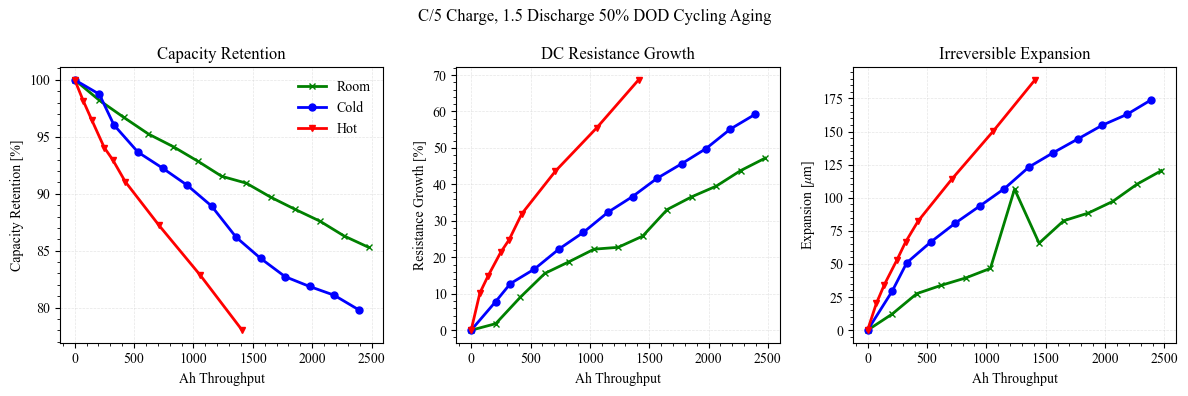

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
cells = [16,17,18]
ax1 = ax.flat[0]
name = "Capacity Retention [%]"
for i,n in enumerate(cells):
    ax1.plot(esoh_data[n]["Ah_th"],esoh_data[n][name],markersize=5,color=colors[i],marker=markers[i])
ax1.legend(["Room","Cold","Hot"])
ax2 = ax.flat[1]
name = "Rs_ave"
for i,n in enumerate(cells):
    ax2.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name]-esoh_data[n][name][0])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i])
ax3 = ax.flat[2]
name = "irrev_exp"
for i,n in enumerate(cells):
    ax3.plot(esoh_data[n]["Ah_th"],esoh_data[n][name],markersize=5,color=colors[i],marker=markers[i])
ax1.set_title("Capacity Retention")
ax2.set_title("DC Resistance Growth")
ax3.set_title("Irreversible Expansion")
ax1.set_ylabel(r"Capacity Retention [%]")
ax2.set_ylabel(r'Resistance Growth [%]')
ax3.set_ylabel(r"Expansion [$\mu$m]")
ax1.set_xlabel("Ah Throughput")
ax2.set_xlabel("Ah Throughput")
ax3.set_xlabel("Ah Throughput")
fig.suptitle("C/5 Charge, 1.5 Discharge 50% DOD Cycling Aging")
fig.tight_layout()
fig.savefig(fig_DIR+"MixedC_50DOD_temp_summary.png")
plt.show()

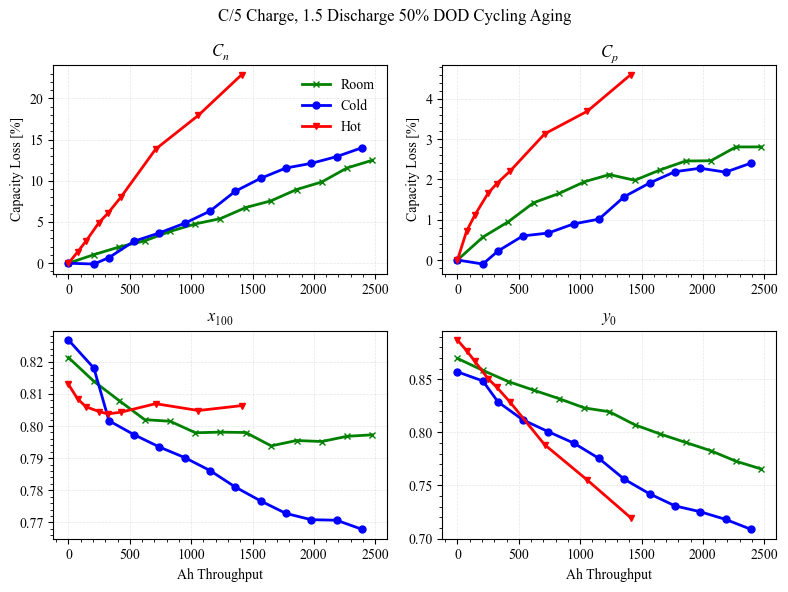

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(8,6))
cells = [16,17,18]
ax1 = ax.flat[0]
name = "C_n"
for i,n in enumerate(cells):
    ax1.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name][0]-esoh_data[n][name])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i])
ax1.legend(["Room","Cold","Hot"])
ax2 = ax.flat[1]
name = "C_p"
for i,n in enumerate(cells):
    ax2.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name][0]-esoh_data[n][name])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i])
ax3 = ax.flat[2]
name = "x_100"
for i,n in enumerate(cells):
    ax3.plot(esoh_data[n]["Ah_th"],esoh_data[n][name],markersize=5,color=colors[i],marker=markers[i])
ax4 = ax.flat[3]
name = "y_0"
for i,n in enumerate(cells):
    ax4.plot(esoh_data[n]["Ah_th"],esoh_data[n][name],markersize=5,color=colors[i],marker=markers[i])
ax1.set_title(r"$C_n$")
ax2.set_title(r"$C_p$")
ax3.set_title(r"$x_{100}$")
ax4.set_title(r"$y_{0}$")
ax1.set_ylabel(r"Capacity Loss [%]")
ax2.set_ylabel(r"Capacity Loss [%]")
ax3.set_xlabel("Ah Throughput")
ax4.set_xlabel("Ah Throughput")
fig.suptitle("C/5 Charge, 1.5 Discharge 50% DOD Cycling Aging")
fig.tight_layout()
fig.savefig(fig_DIR+"MixedC_50DOD_temp_eSOH.png")
plt.show()

# Compare C-rate

In [ ]:
sdfsd

NameError: name 'sdfsd' is not defined

## Room Temp

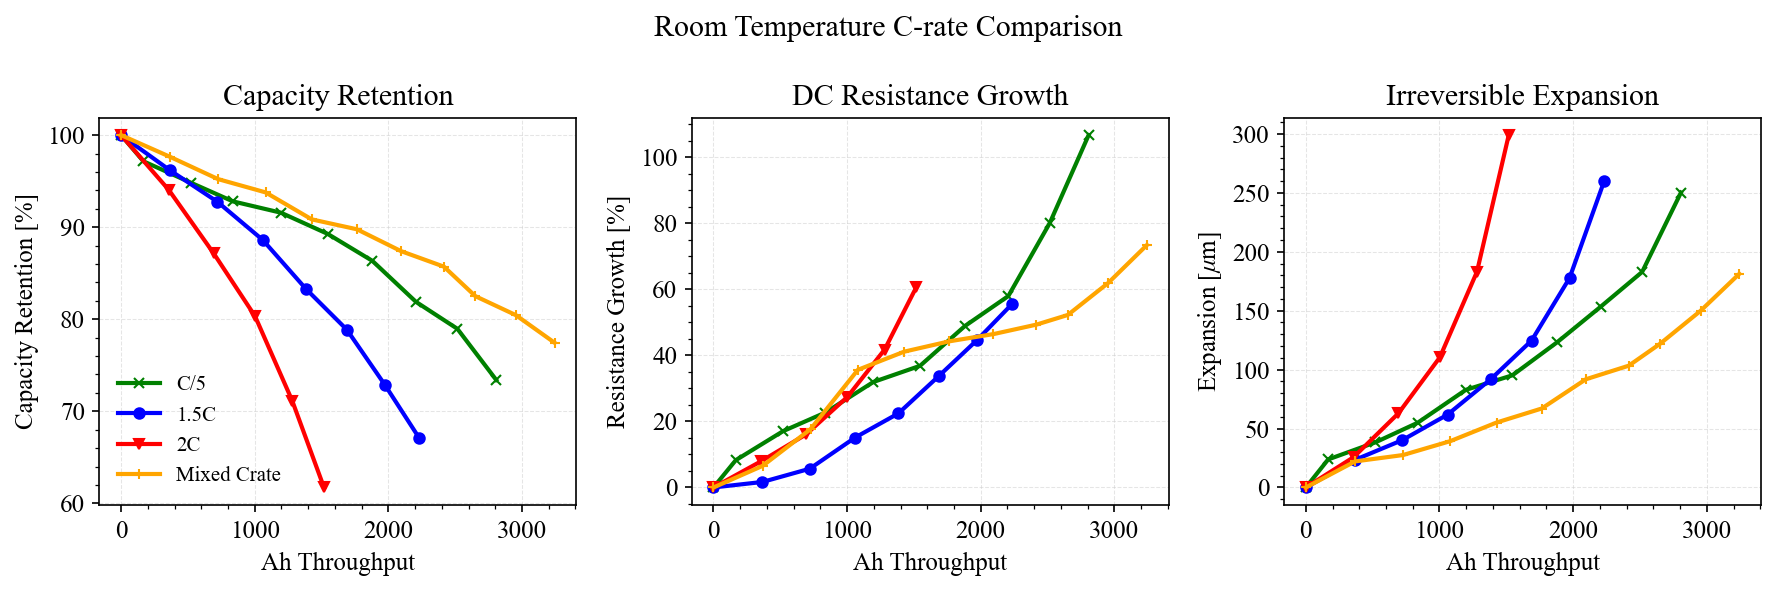

In [14]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
cells = [1,4,7,10]
ax1 = ax.flat[0]
name = "Capacity Retention [%]"
for i,n in enumerate(cells):
    ax1.plot(esoh_data[n]["Ah_th"],esoh_data[n][name],markersize=5,color=colors[i],marker=markers[i])
ax1.legend(["C/5","1.5C","2C","Mixed Crate"])
ax2 = ax.flat[1]
name = "Rs_ave"
for i,n in enumerate(cells):
    ax2.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name]-esoh_data[n][name][0])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i])
ax3 = ax.flat[2]
name = "irrev_exp"
for i,n in enumerate(cells):
    ax3.plot(esoh_data[n]["Ah_th"],esoh_data[n][name],markersize=5,color=colors[i],marker=markers[i])
ax1.set_title("Capacity Retention")
ax2.set_title("DC Resistance Growth")
ax3.set_title("Irreversible Expansion")
ax1.set_ylabel(r"Capacity Retention [%]")
ax2.set_ylabel(r'Resistance Growth [%]')
ax3.set_ylabel(r"Expansion [$\mu$m]")
ax1.set_xlabel("Ah Throughput")
ax2.set_xlabel("Ah Throughput")
ax3.set_xlabel("Ah Throughput")
fig.suptitle("Room Temperature C-rate Comparison")
fig.tight_layout()
fig.savefig(fig_DIR+"Room_temp_crate_summary.png")
plt.show()

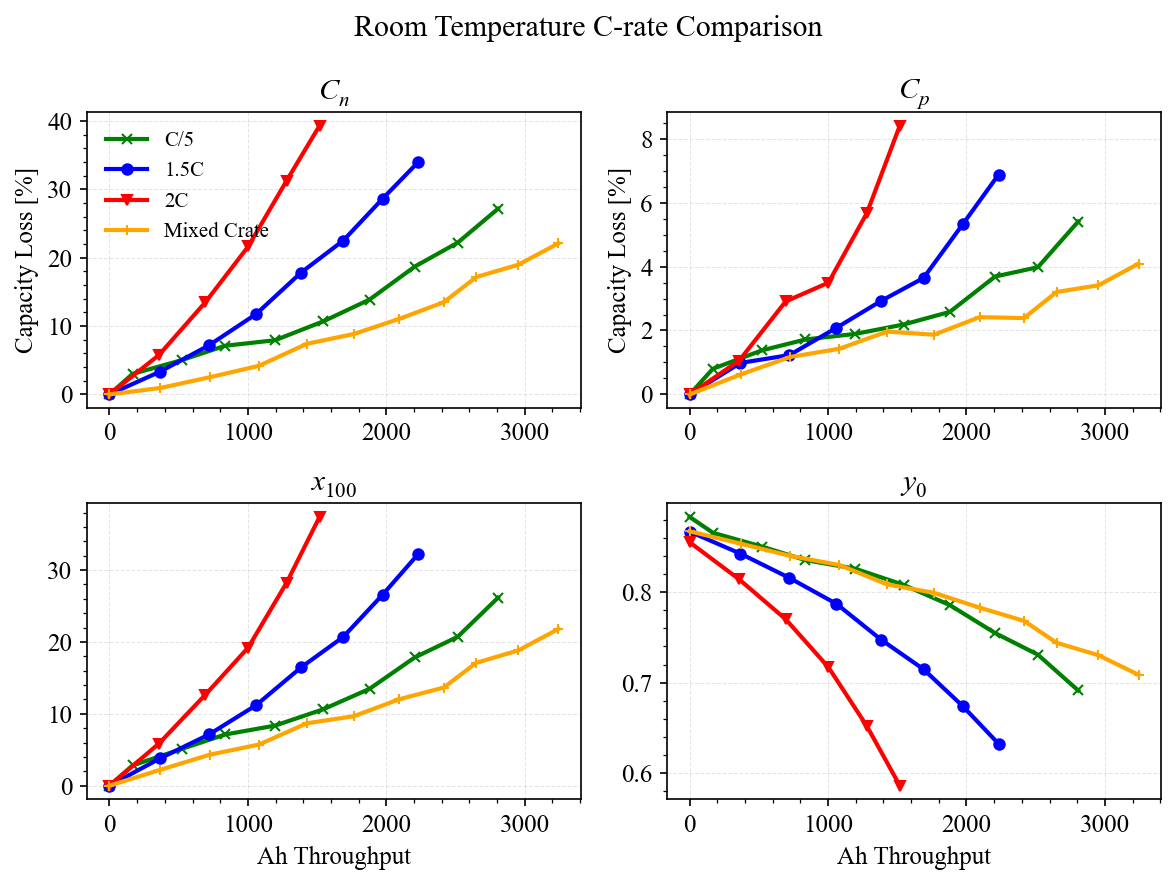

In [16]:
fig, ax = plt.subplots(2,2,figsize=(8,6))
cells = [1,4,7,10]
ax1 = ax.flat[0]
name = "C_n"
for i,n in enumerate(cells):
    ax1.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name][0]-esoh_data[n][name])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i])
ax1.legend(["C/5","1.5C","2C","Mixed Crate"])
ax2 = ax.flat[1]
name = "C_p"
for i,n in enumerate(cells):
    ax2.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name][0]-esoh_data[n][name])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i])
ax3 = ax.flat[2]
name = "x_100"
for i,n in enumerate(cells):
    ax3.plot(esoh_data[n]["Ah_th"],esoh_data[n][name],markersize=5,color=colors[i],marker=markers[i])
ax4 = ax.flat[3]
name = "y_0"
for i,n in enumerate(cells):
    ax4.plot(esoh_data[n]["Ah_th"],esoh_data[n][name],markersize=5,color=colors[i],marker=markers[i])
ax1.set_title(r"$C_n$")
ax2.set_title(r"$C_p$")
ax3.set_title(r"$x_{100}$")
ax4.set_title(r"$y_{0}$")
ax1.set_ylabel(r"Capacity Loss [%]")
ax2.set_ylabel(r"Capacity Loss [%]")
ax3.set_xlabel("Ah Throughput")
ax4.set_xlabel("Ah Throughput")
fig.suptitle("Room Temperature C-rate Comparison")
fig.tight_layout()
fig.savefig(fig_DIR+"Room_temp_crate_eSOH.png")
plt.show()

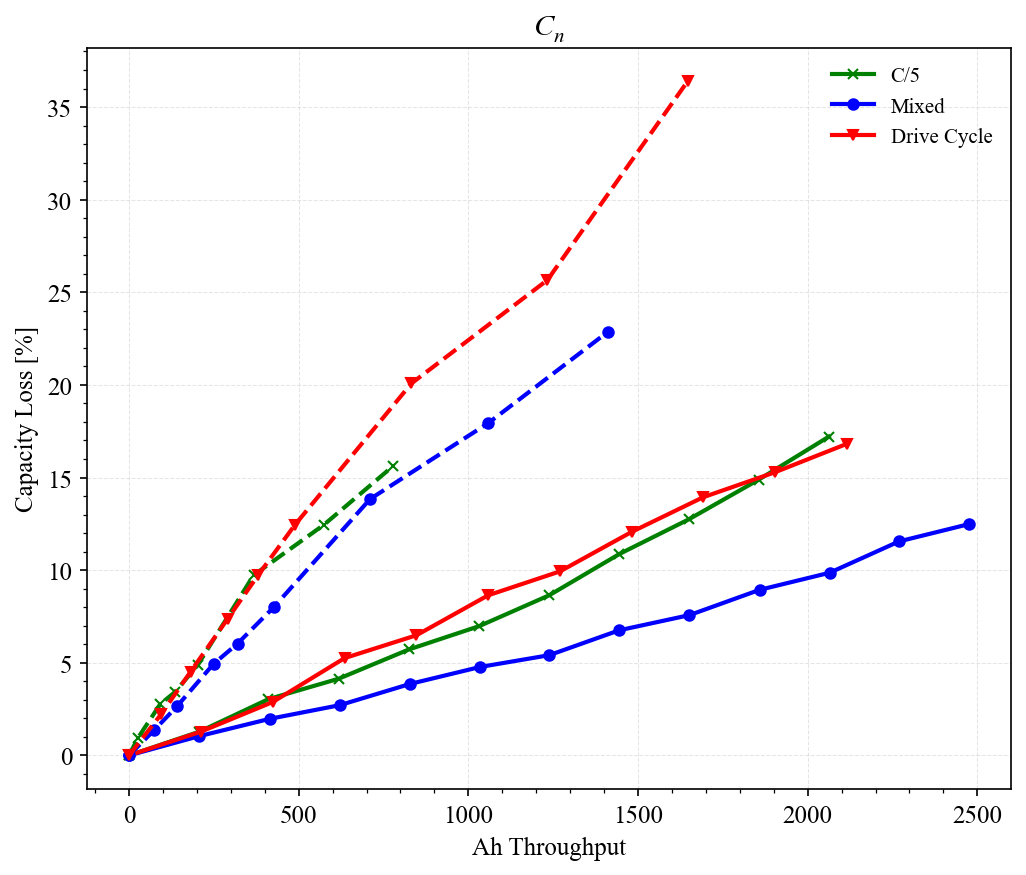

In [26]:
fig, ax = plt.subplots(1,1,figsize=(7,6))
cells = [13,16,19]
ax1 = ax
name = "C_n"
for i,n in enumerate(cells):
    ax1.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name][0]-esoh_data[n][name])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i])
ax1.legend(["C/5","Mixed","Drive Cycle","Mixed Crate"])
cells = [13+2,16+2,19+2]
name = "C_n"
for i,n in enumerate(cells):
    ax1.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name][0]-esoh_data[n][name])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i],linestyle='dashed')

ax1.set_title(r"$C_n$")
ax1.set_ylabel(r"Capacity Loss [%]")
ax1.set_xlabel("Ah Throughput")
# fig.suptitle("Room Temperature C-rate Comparison")
fig.tight_layout()
# fig.savefig(fig_DIR+"Room_temp_crate_eSOH.png")
plt.show()

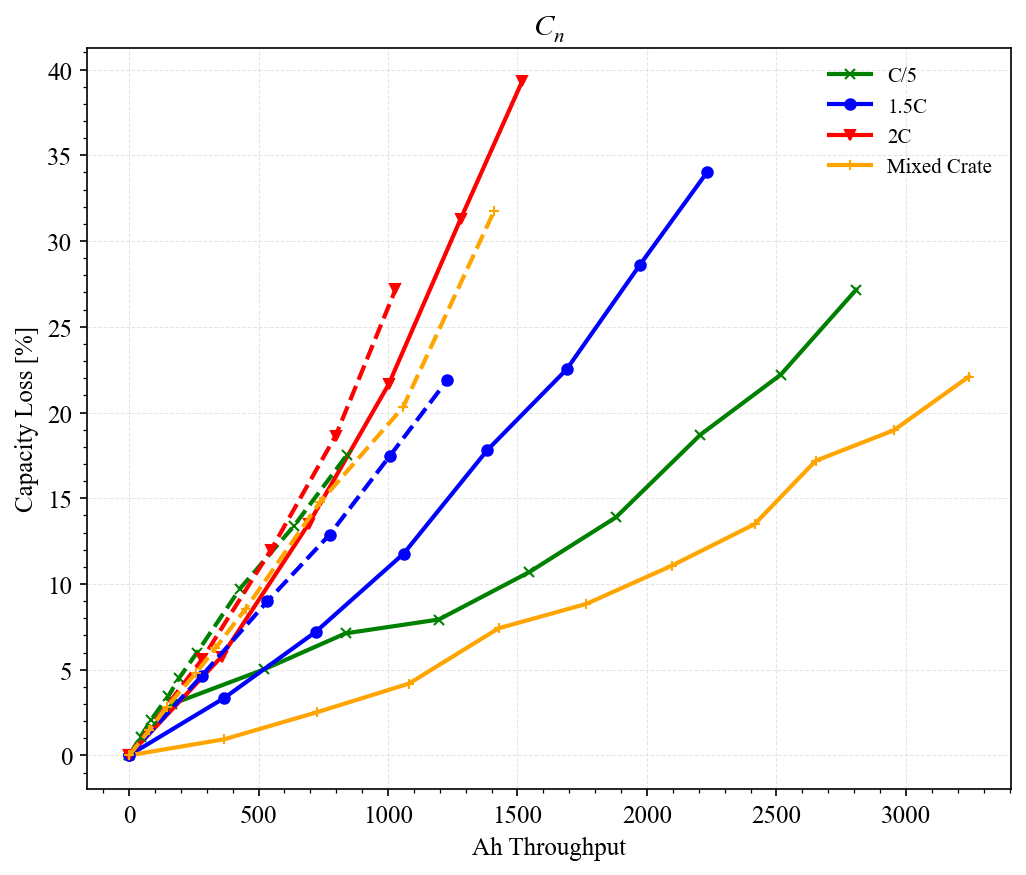

In [19]:
fig, ax = plt.subplots(1,1,figsize=(7,6))
cells = [1,4,7,10]
ax1 = ax
name = "C_n"
for i,n in enumerate(cells):
    ax1.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name][0]-esoh_data[n][name])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i])
ax1.legend(["C/5","1.5C","2C","Mixed Crate"])
cells = [1+2,4+2,7+2,10+2]
name = "C_n"
for i,n in enumerate(cells):
    ax1.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name][0]-esoh_data[n][name])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i],linestyle='dashed')

ax1.set_title(r"$C_n$")
ax1.set_ylabel(r"Capacity Loss [%]")
ax1.set_xlabel("Ah Throughput")
# fig.suptitle("Room Temperature C-rate Comparison")
fig.tight_layout()
# fig.savefig(fig_DIR+"Room_temp_crate_eSOH.png")
plt.show()

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(8,6))
cells = [1,4,7,10]
ax1 = ax.flat[0]
name = "C_n"
for i,n in enumerate(cells):
    ax1.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name][0]-esoh_data[n][name])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i])
ax1.legend(["C/5","1.5C","2C","Mixed Crate"])
ax2 = ax.flat[1]
name = "C_p"
for i,n in enumerate(cells):
    ax2.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name][0]-esoh_data[n][name])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i])
ax3 = ax.flat[2]
name = ""
for i,n in enumerate(cells):
    ax3.plot(esoh_data[n]["Ah_th"],esoh_data[n][name],markersize=5,color=colors[i],marker=markers[i])
ax4 = ax.flat[3]
name = "y_0"
for i,n in enumerate(cells):
    ax4.plot(esoh_data[n]["Ah_th"],esoh_data[n][name],markersize=5,color=colors[i],marker=markers[i])
ax1.set_title(r"$C_n$")
ax2.set_title(r"$C_p$")
ax3.set_title(r"$x_{100}$")
ax4.set_title(r"$y_{0}$")
ax1.set_ylabel(r"Capacity Loss [%]")
ax2.set_ylabel(r"Capacity Loss [%]")
ax3.set_xlabel("Ah Throughput")
ax4.set_xlabel("Ah Throughput")
fig.suptitle("Room Temperature C-rate Comparison")
fig.tight_layout()
fig.savefig(fig_DIR+"Room_temp_crate_eSOH.png")
plt.show()

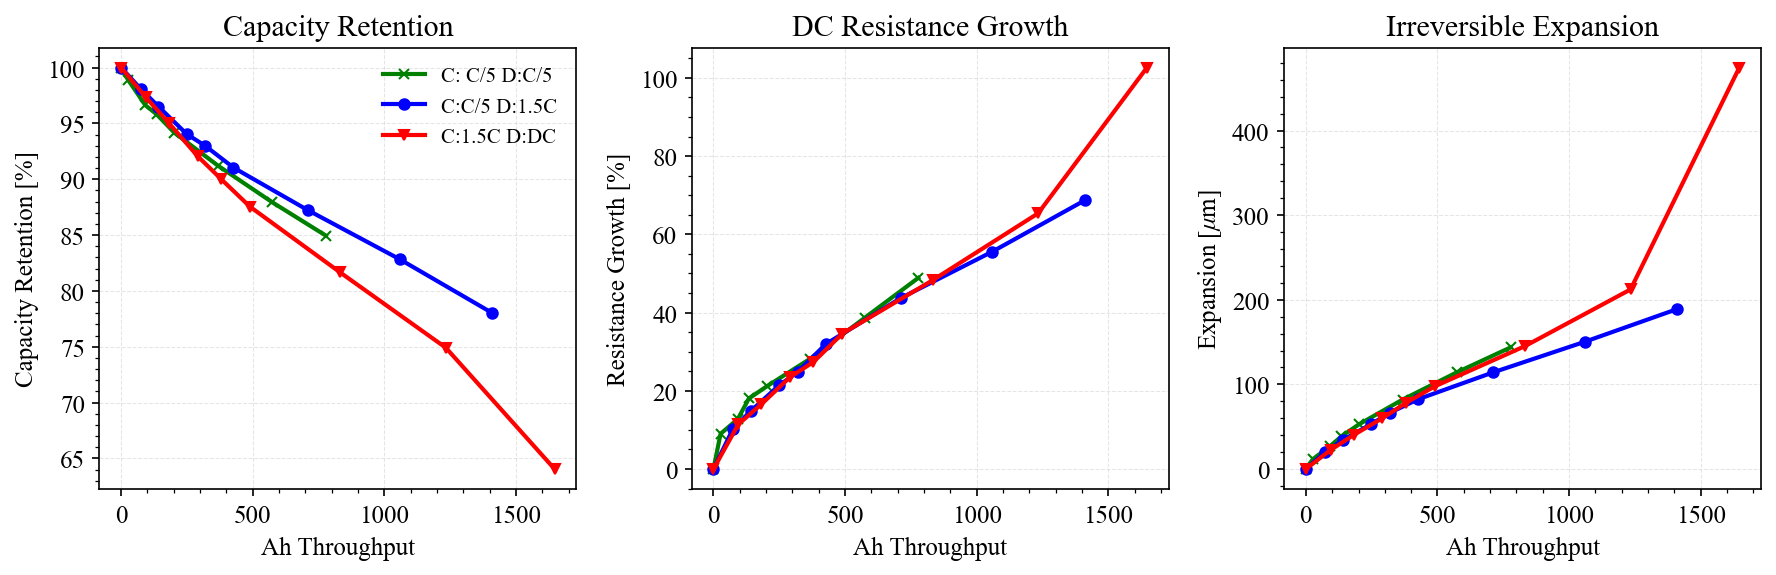

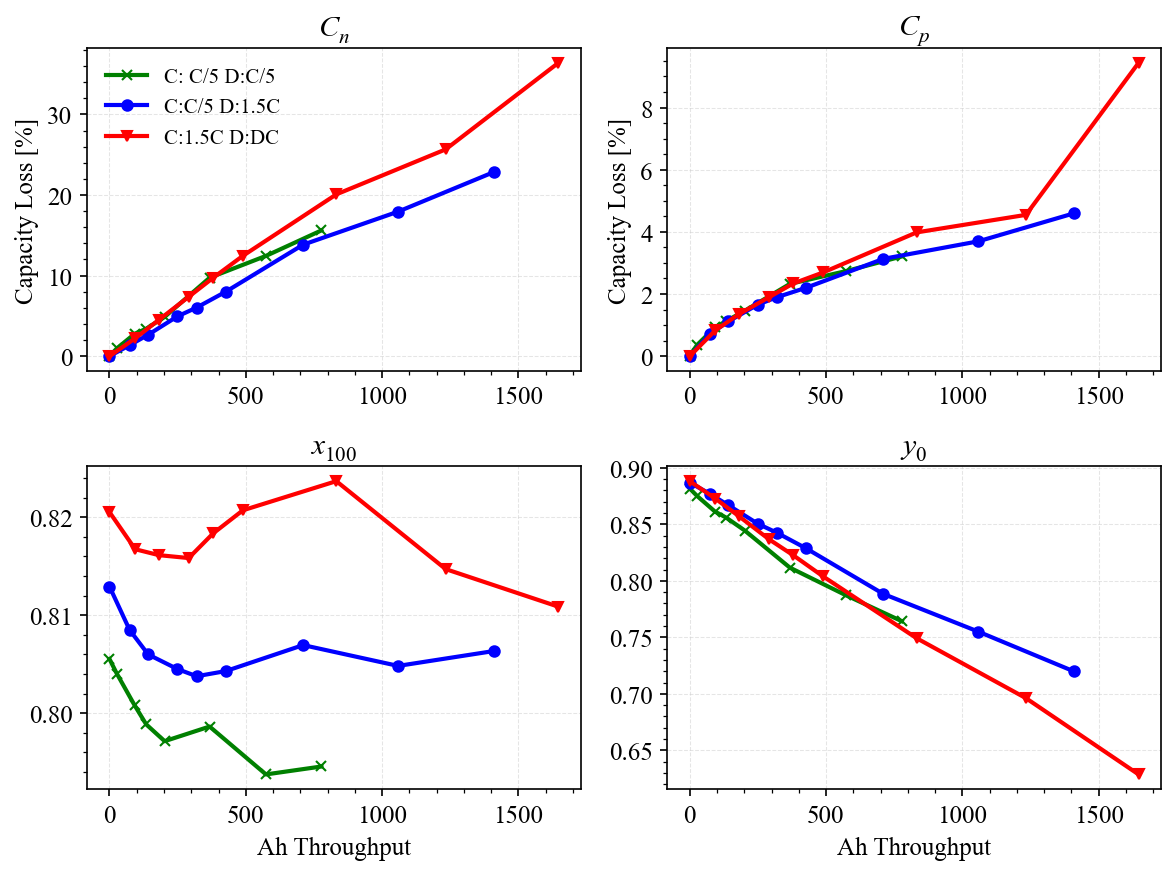

In [25]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
cells = [13+2,16+2,19+2]
ax1 = ax.flat[0]
name = "Capacity Retention [%]"
for i,n in enumerate(cells):
    ax1.plot(esoh_data[n]["Ah_th"],esoh_data[n][name],markersize=5,color=colors[i],marker=markers[i])
ax1.legend(["C: C/5 D:C/5","C:C/5 D:1.5C","C:1.5C D:DC"])
ax2 = ax.flat[1]
name = "Rs_ave"
for i,n in enumerate(cells):
    ax2.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name]-esoh_data[n][name][0])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i])
ax3 = ax.flat[2]
name = "irrev_exp"
for i,n in enumerate(cells):
    ax3.plot(esoh_data[n]["Ah_th"],esoh_data[n][name],markersize=5,color=colors[i],marker=markers[i])
ax1.set_title("Capacity Retention")
ax2.set_title("DC Resistance Growth")
ax3.set_title("Irreversible Expansion")
ax1.set_ylabel(r"Capacity Retention [%]")
ax2.set_ylabel(r'Resistance Growth [%]')
ax3.set_ylabel(r"Expansion [$\mu$m]")
ax1.set_xlabel("Ah Throughput")
ax2.set_xlabel("Ah Throughput")
ax3.set_xlabel("Ah Throughput")
# fig.suptitle("C/5 Cycling Aging")
fig.tight_layout()
# fig.savefig(fig_DIR+"C5_temp_summary.png")
plt.show()

fig, ax = plt.subplots(2,2,figsize=(8,6))
cells = [13+2,16+2,19+2]
ax1 = ax.flat[0]
name = "C_n"
for i,n in enumerate(cells):
    ax1.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name][0]-esoh_data[n][name])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i])
ax1.legend(["C: C/5 D:C/5","C:C/5 D:1.5C","C:1.5C D:DC"])
ax2 = ax.flat[1]
name = "C_p"
for i,n in enumerate(cells):
    ax2.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name][0]-esoh_data[n][name])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i])
ax3 = ax.flat[2]
name = "x_100"
for i,n in enumerate(cells):
    ax3.plot(esoh_data[n]["Ah_th"],esoh_data[n][name],markersize=5,color=colors[i],marker=markers[i])
ax4 = ax.flat[3]
name = "y_0"
for i,n in enumerate(cells):
    ax4.plot(esoh_data[n]["Ah_th"],esoh_data[n][name],markersize=5,color=colors[i],marker=markers[i])
ax1.set_title(r"$C_n$")
ax2.set_title(r"$C_p$")
ax3.set_title(r"$x_{100}$")
ax4.set_title(r"$y_{0}$")
ax1.set_ylabel(r"Capacity Loss [%]")
ax2.set_ylabel(r"Capacity Loss [%]")
ax3.set_xlabel("Ah Throughput")
ax4.set_xlabel("Ah Throughput")
# fig.suptitle("C/5 Cycling Aging")
fig.tight_layout()
plt.show()

## Hot Temp

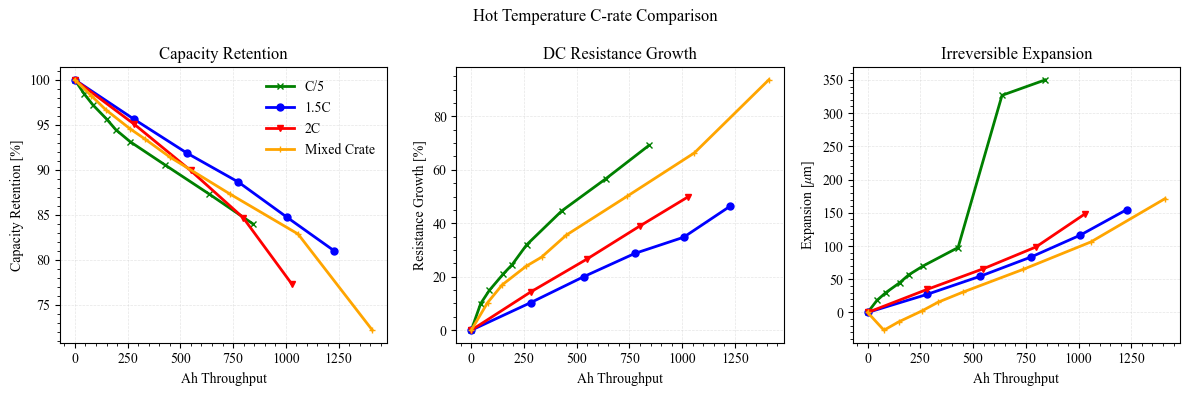

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
cells = [3,6,9,12]
ax1 = ax.flat[0]
name = "Capacity Retention [%]"
for i,n in enumerate(cells):
    ax1.plot(esoh_data[n]["Ah_th"],esoh_data[n][name],markersize=5,color=colors[i],marker=markers[i])
ax1.legend(["C/5","1.5C","2C","Mixed Crate"])
ax2 = ax.flat[1]
name = "Rs_ave"
for i,n in enumerate(cells):
    ax2.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name]-esoh_data[n][name][0])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i])
ax3 = ax.flat[2]
name = "irrev_exp"
for i,n in enumerate(cells):
    ax3.plot(esoh_data[n]["Ah_th"],esoh_data[n][name],markersize=5,color=colors[i],marker=markers[i])
ax1.set_title("Capacity Retention")
ax2.set_title("DC Resistance Growth")
ax3.set_title("Irreversible Expansion")
ax1.set_ylabel(r"Capacity Retention [%]")
ax2.set_ylabel(r'Resistance Growth [%]')
ax3.set_ylabel(r"Expansion [$\mu$m]")
ax1.set_xlabel("Ah Throughput")
ax2.set_xlabel("Ah Throughput")
ax3.set_xlabel("Ah Throughput")
fig.suptitle("Hot Temperature C-rate Comparison")
fig.tight_layout()
fig.savefig(fig_DIR+"Hot_temp_crate_summary.png")
plt.show()

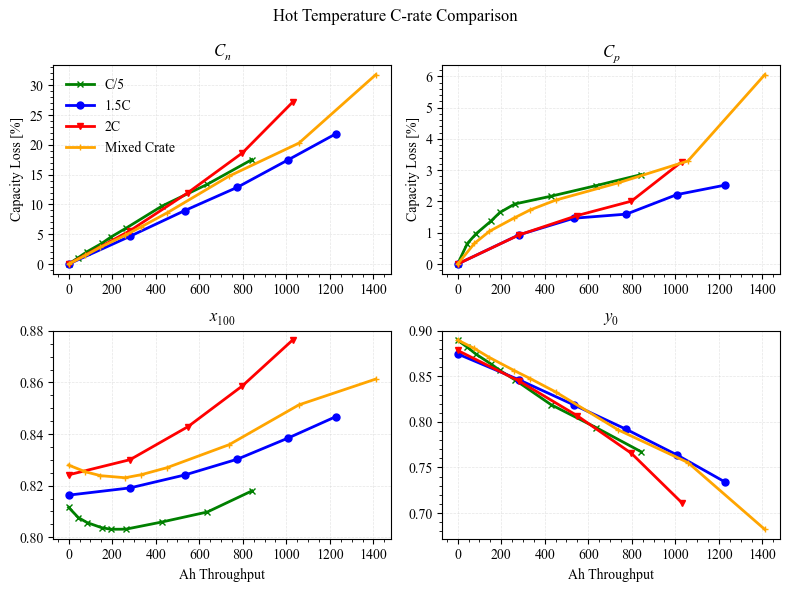

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(8,6))
cells = [3,6,9,12]
ax1 = ax.flat[0]
name = "C_n"
for i,n in enumerate(cells):
    ax1.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name][0]-esoh_data[n][name])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i])
ax1.legend(["C/5","1.5C","2C","Mixed Crate"])
ax2 = ax.flat[1]
name = "C_p"
for i,n in enumerate(cells):
    ax2.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name][0]-esoh_data[n][name])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i])
ax3 = ax.flat[2]
name = "x_100"
for i,n in enumerate(cells):
    ax3.plot(esoh_data[n]["Ah_th"],esoh_data[n][name],markersize=5,color=colors[i],marker=markers[i])
ax4 = ax.flat[3]
name = "y_0"
for i,n in enumerate(cells):
    ax4.plot(esoh_data[n]["Ah_th"],esoh_data[n][name],markersize=5,color=colors[i],marker=markers[i])
ax1.set_title(r"$C_n$")
ax2.set_title(r"$C_p$")
ax3.set_title(r"$x_{100}$")
ax4.set_title(r"$y_{0}$")
ax1.set_ylabel(r"Capacity Loss [%]")
ax2.set_ylabel(r"Capacity Loss [%]")
ax3.set_xlabel("Ah Throughput")
ax4.set_xlabel("Ah Throughput")
fig.suptitle("Hot Temperature C-rate Comparison")
fig.tight_layout()
fig.savefig(fig_DIR+"Hot_temp_crate_eSOH.png")
plt.show()

## Cold Temp

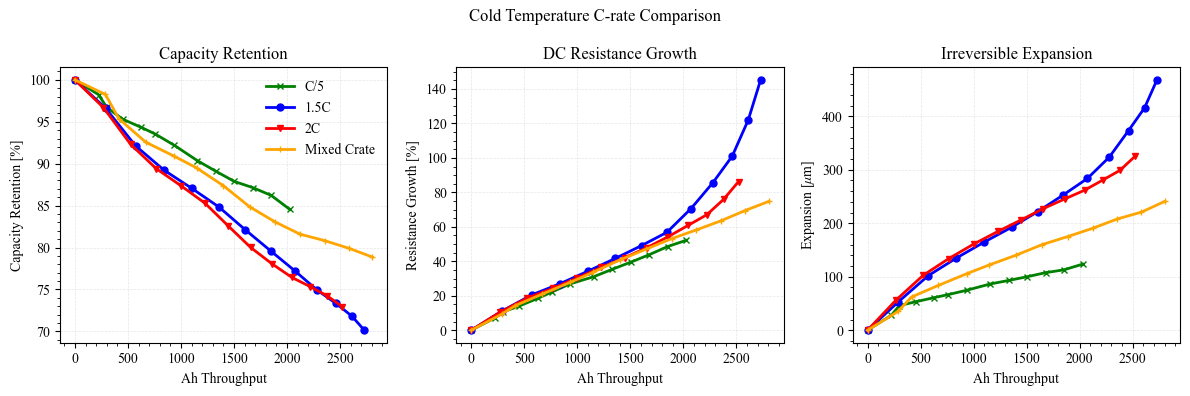

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
cells = [2,5,8,11]
ax1 = ax.flat[0]
name = "Capacity Retention [%]"
for i,n in enumerate(cells):
    ax1.plot(esoh_data[n]["Ah_th"],esoh_data[n][name],markersize=5,color=colors[i],marker=markers[i])
ax1.legend(["C/5","1.5C","2C","Mixed Crate"])
ax2 = ax.flat[1]
name = "Rs_ave"
for i,n in enumerate(cells):
    ax2.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name]-esoh_data[n][name][0])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i])
ax3 = ax.flat[2]
name = "irrev_exp"
for i,n in enumerate(cells):
    ax3.plot(esoh_data[n]["Ah_th"],esoh_data[n][name],markersize=5,color=colors[i],marker=markers[i])
ax1.set_title("Capacity Retention")
ax2.set_title("DC Resistance Growth")
ax3.set_title("Irreversible Expansion")
ax1.set_ylabel(r"Capacity Retention [%]")
ax2.set_ylabel(r'Resistance Growth [%]')
ax3.set_ylabel(r"Expansion [$\mu$m]")
ax1.set_xlabel("Ah Throughput")
ax2.set_xlabel("Ah Throughput")
ax3.set_xlabel("Ah Throughput")
fig.suptitle("Cold Temperature C-rate Comparison")
fig.tight_layout()
fig.savefig(fig_DIR+"Cold_temp_crate_summary.png")
plt.show()

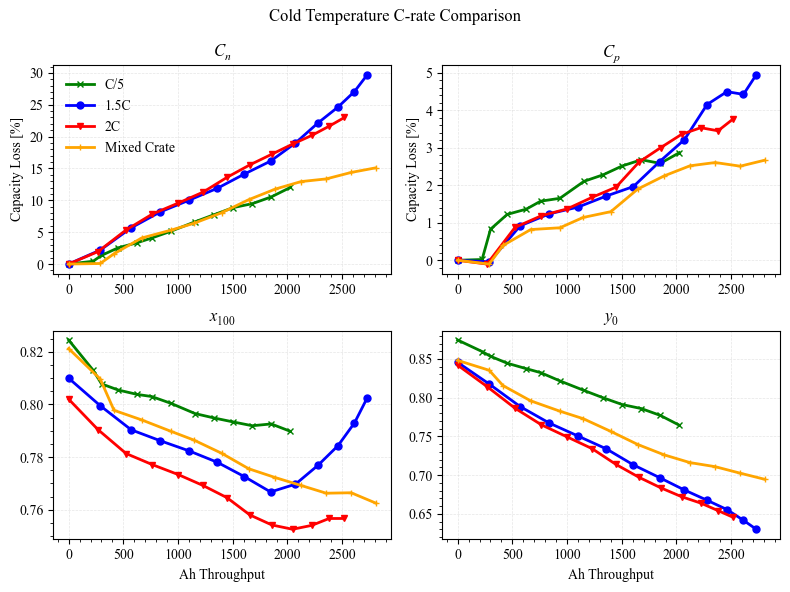

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(8,6))
cells = [2,5,8,11]
ax1 = ax.flat[0]
name = "C_n"
for i,n in enumerate(cells):
    ax1.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name][0]-esoh_data[n][name])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i])
ax1.legend(["C/5","1.5C","2C","Mixed Crate"])
ax2 = ax.flat[1]
name = "C_p"
for i,n in enumerate(cells):
    ax2.plot(esoh_data[n]["Ah_th"],(esoh_data[n][name][0]-esoh_data[n][name])*100/esoh_data[n][name][0],markersize=5,color=colors[i],marker=markers[i])
ax3 = ax.flat[2]
name = "x_100"
for i,n in enumerate(cells):
    ax3.plot(esoh_data[n]["Ah_th"],esoh_data[n][name],markersize=5,color=colors[i],marker=markers[i])
ax4 = ax.flat[3]
name = "y_0"
for i,n in enumerate(cells):
    ax4.plot(esoh_data[n]["Ah_th"],esoh_data[n][name],markersize=5,color=colors[i],marker=markers[i])
ax1.set_title(r"$C_n$")
ax2.set_title(r"$C_p$")
ax3.set_title(r"$x_{100}$")
ax4.set_title(r"$y_{0}$")
ax1.set_ylabel(r"Capacity Loss [%]")
ax2.set_ylabel(r"Capacity Loss [%]")
ax3.set_xlabel("Ah Throughput")
ax4.set_xlabel("Ah Throughput")
fig.suptitle("Cold Temperature C-rate Comparison")
fig.tight_layout()
fig.savefig(fig_DIR+"Cold_temp_crate_eSOH.png")
plt.show()

# Peak Alignment

## Calendar

Text(0.5, 1.0, 'Calendar Aging: $C_n$')

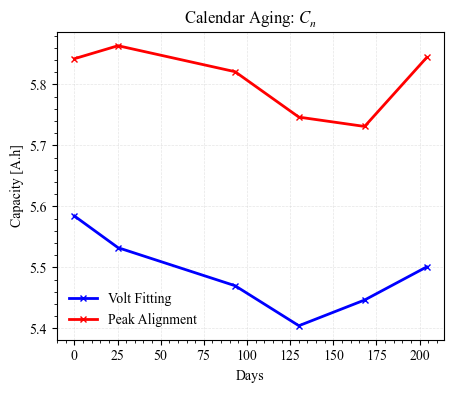

In [ ]:
Cn_PA = [5.8422,5.8635,5.8209,5.7464,5.7311,5.8442]
Cn_V = [5.584215594,5.532257329,5.469868962,5.404239192,5.446420415,5.500687684]
Time = [0,25.27056716,93.06850962,130.0293551,168.1198502,204.0584731]

fig,ax = plt.subplots(1,1,figsize=(5,4))
ax.plot(Time,Cn_V,'bx-')
ax.plot(Time,Cn_PA,'rx-')
ax.legend(["Volt Fitting","Peak Alignment"])
ax.set_xlabel("Days")
ax.set_ylabel("Capacity [A.h]")
ax.set_title(r"Calendar Aging: $C_n$")


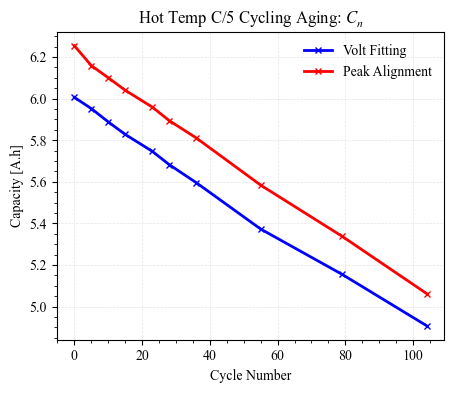

In [ ]:
cell = 3
cell_no = f'{cell:02d}'
dfe_VE=pd.read_csv(eSOH_DIR+"aging_param_cell_"+cell_no+".csv")
dfe_PA=pd.read_csv(eSOH_DIR+"aging_param_PA_cell_"+cell_no+".csv")
fig,ax = plt.subplots(1,1,figsize=(5,4))
ax.plot(dfe_VE["N"],dfe_VE["C_n"],'bx-')
ax.plot(dfe_PA["N"],dfe_PA["C_n"],'rx-')
ax.legend(["Volt Fitting","Peak Alignment"])
ax.set_xlabel("Cycle Number")
ax.set_ylabel("Capacity [A.h]")
ax.set_title(r"Hot Temp C/5 Cycling Aging: $C_n$")
fig.savefig(fig_DIR+"compare_Cn_PA_cell_"+cell_no+".png")

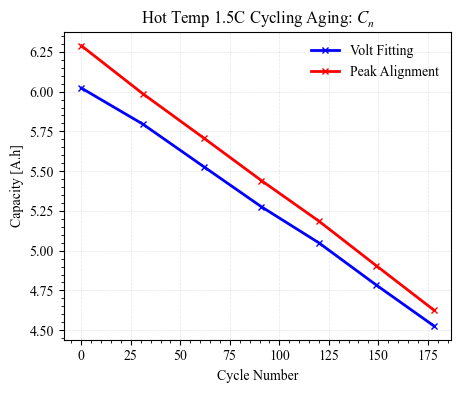

In [ ]:
cell = 6
cell_no = f'{cell:02d}'
dfe_VE=pd.read_csv(eSOH_DIR+"aging_param_cell_"+cell_no+".csv")
dfe_PA=pd.read_csv(eSOH_DIR+"aging_param_PA_cell_"+cell_no+".csv")
fig,ax = plt.subplots(1,1,figsize=(5,4))
ax.plot(dfe_VE["N"],dfe_VE["C_n"],'bx-')
ax.plot(dfe_PA["N"],dfe_PA["C_n"],'rx-')
ax.legend(["Volt Fitting","Peak Alignment"])
ax.set_xlabel("Cycle Number")
ax.set_ylabel("Capacity [A.h]")
ax.set_title(r"Hot Temp 1.5C Cycling Aging: $C_n$")
fig.savefig(fig_DIR+"compare_Cn_PA_cell_"+cell_no+".png")

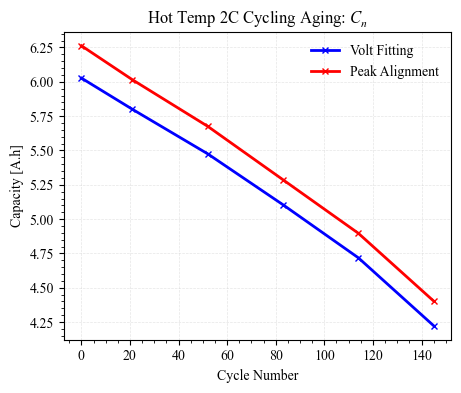

In [ ]:
cell = 9
cell_no = f'{cell:02d}'
dfe_VE=pd.read_csv(eSOH_DIR+"aging_param_cell_"+cell_no+".csv")
dfe_PA=pd.read_csv(eSOH_DIR+"aging_param_PA_cell_"+cell_no+".csv")
fig,ax = plt.subplots(1,1,figsize=(5,4))
ax.plot(dfe_VE["N"],dfe_VE["C_n"],'bx-')
ax.plot(dfe_PA["N"],dfe_PA["C_n"],'rx-')
ax.legend(["Volt Fitting","Peak Alignment"])
ax.set_xlabel("Cycle Number")
ax.set_ylabel("Capacity [A.h]")
ax.set_title(r"Hot Temp 2C Cycling Aging: $C_n$")
fig.savefig(fig_DIR+"compare_Cn_PA_cell_"+cell_no+".png")

In [ ]:
cells

[2, 5, 8]

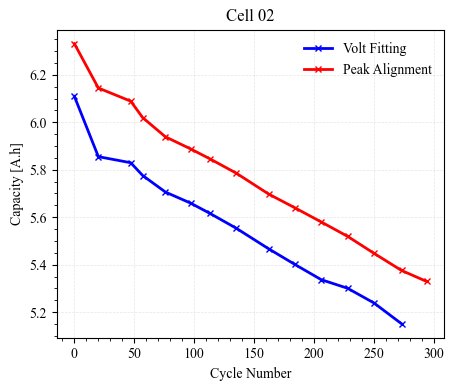

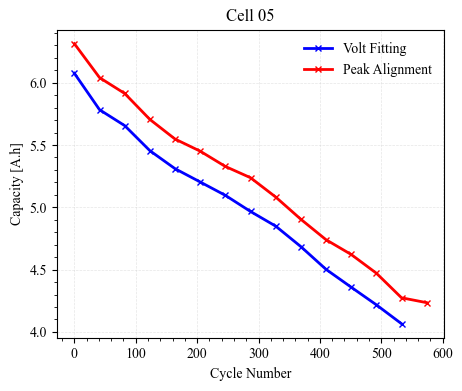

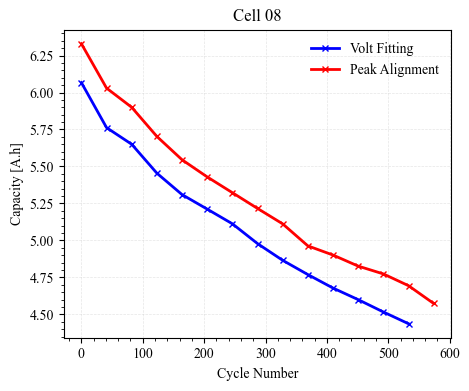

In [ ]:
for cell in cells:
    cell_no = f'{cell:02d}'
    dfe_VE=pd.read_csv(eSOH_DIR+"aging_param_cell_"+cell_no+".csv")
    dfe_PA=pd.read_csv(eSOH_DIR+"aging_param_PA_cell_"+cell_no+".csv")
    fig,ax = plt.subplots(1,1,figsize=(5,4))
    ax.plot(dfe_VE["N"],dfe_VE["C_n"],'bx-')
    ax.plot(dfe_PA["N"],dfe_PA["C_n"],'rx-')
    ax.legend(["Volt Fitting","Peak Alignment"])
    ax.set_xlabel("Cycle Number")
    ax.set_ylabel("Capacity [A.h]")
    ax.set_title( "Cell "+cell_no)